# people_詞對計算
* 針對已斷詞的文本，計算字詞出現的頻率（詞頻）與詞對之現的頻率。
* 我們有多個年度，可以觀察各年度出現字詞的變化，繪製折線圖。
* 詞對是指不同字詞配對。不同字詞會共同出現，而且頻率很高，代表這兩個字詞一定有某些關係存在。
* 我們可以指定特定關鍵詞為標的，然後觀察與這個標的共同出現的字詞，比較其逐年變化。
* 可以配合語料庫，設定條件，篩選符合條件的詞對，以突顯關心的主題。
* 繪製社會網絡關係圖，顯示字詞間的關聯性。

# 與台灣共同出現的詞對 
* 尋找與標的詞共現性最高的字詞。代表其潛在語意。共同出現必然有特殊的意義。
* 加上詞性與類別篩選，聚焦於某個面向。
* 以年度匯整，觀察趨勢變化。
* 依年度分群。
* 各群的文字雲圖

In [4]:
from collections import Counter
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

# 中文設定1: 楷體字
from matplotlib import rcParams
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

## 不同年度，分別計算，以便比較 

In [5]:
#########################################################
# 可選擇特定的年度，年度多跑起來時間會很久 #################
year=[1946,1947,1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003]
kw=["台湾"]    # 可以多個關鍵字 list
path2='d:/My python/people/jieba/'

In [5]:
# 依不同年度，分別計算詞對數，會很花時間
pair_word=[]
pair_count=[]
pair_dict=[]
for n in range(len(year)):
    # 宣告計數器
    word_pair_count=Counter()
    fname=str(year[n])+"_jieba.xlsx"
    df=pd.read_excel(path2+fname, 0)    
    token=list(df.token)
    for t in range(len(token)):
        try:  # 有些文章無值會出現 error, 跳過
            tokens=token[t]
            # 刪除標點符號
            tok=re.sub(r"[、。（），：％；《》“”]","",tokens)
            tok=tok.split()    
            # 間隔 m 個字以內的配對，稱為 window=m ##################
            m=10
            for i in range(len(tok)-1
                # j 代表距離 從 1 到 m
                for j in range(1,m+1):     
                    # i+j 代表間隔 j 以後的下一個字詞
                    if i+j < len(tok):            
                        # tuple
                        (w1,w2)=tok[i],tok[i+j]
                        # 關鍵字出對在詞對的第一個與第二個位置均納入，單一字不列入
                        # 此處 kw 為台灣，亦即尋找與台灣的配對
                        if (w1 in kw) and len(w2)>1 and w2 not in kw:
                          # 如果從語料庫篩選詞彙  
                          # if (w2 in corpus):  
                            # 詞對計數
                            word_pair_count[(kw[0],w2)]+=1
                            # 倒過來，再計一次，到時候刪除重覆
                            word_pair_count[(w2,kw[0])]+=1      
                        elif (w2 in kw) and len(w1)>1 and w1 not in kw:
                            # if (w2 in corpus):  
                            word_pair_count[(w1,kw[0])]+=1
                            word_pair_count[(kw[0],w1)]+=1
                            
        except:
            pass   
        
    # 選取前 100 大配對，重覆的詞對刪除  ##################  
    pai=[]
    cou=[]
    for w,c in word_pair_count.most_common(100):   # 前 100 大
        # 只取關鍵字在前，配對詞在後者
        if w[0] == kw[0]:
            pai.append(w[1])
            cou.append(c)                         
    pair_word.append(pai)
    pair_count.append(cou)
    dic = dict(zip(pai,cou))                       
    pair_dict.append(dic)                       
    print (year[n],"done", end=" ")

1946 done 1947 done 1948 done 1949 done 1950 done 1951 done 1952 done 1953 done 1954 done 1955 done 1956 done 1957 done 1958 done 1959 done 1960 done 1961 done 1962 done 1963 done 1964 done 1965 done 1966 done 1967 done 1968 done 1969 done 1970 done 1971 done 1972 done 1973 done 1974 done 1975 done 1976 done 1977 done 1978 done 1979 done 1980 done 1981 done 1982 done 1983 done 1984 done 1985 done 1986 done 1987 done 1988 done 1989 done 1990 done 1991 done 1992 done 1993 done 1994 done 1995 done 1996 done 1997 done 1998 done 1999 done 2000 done 2001 done 2002 done 2003 done 

## dataframe

In [13]:
# 與台灣最常共同出現的詞對，及其個數
data=list(zip(year,pair_word,pair_count,pair_dict))
df4=pd.DataFrame(data,columns=["year","pair_word","pair_count","pair_dict"])    
df4.index=range(len(df4))
df4    

,year,pair_word,pair_count
0,1946,"[美国, 蒋介石, 日本, 国民党, 中国, 接收, 人民, 延安, 上海, 东北, 政府,...","[14, 11, 10, 9, 7, 7, 6, 6, 6, 6, 5, 5, 5, 4, ..."
1,1947,"[人民, 美国, 日本, 蒋介石, 自治, 运动, 政府, 新华社, 训练, 消息, 上海,...","[115, 89, 76, 57, 54, 52, 47, 45, 38, 37, 37, ..."
2,1948,"[美国, 人民, 我们, 日本, 中国, 出卖, 国民党, 华南, 美帝国主义, 公司, 工...","[54, 26, 21, 20, 19, 17, 17, 16, 16, 16, 14, 1..."
3,1949,"[人民, 美国, 解放, 中国, 国民党, 日本, 美帝国主义, 蒋介石, 我们, 侵略, ...","[324, 275, 242, 224, 168, 137, 93, 87, 72, 67,..."
4,1950,"[美国, 侵略, 解放, 朝鲜, 中国, 人民, 我们, 反对, 我国, 领土, 美帝国主义...","[2026, 1755, 1745, 1508, 1455, 1354, 1038, 697..."
5,1951,"[人民, 美国, 侵略, 中国, 朝鲜, 日本, 我们, 美帝国主义, 我国, 解放, 领土...","[445, 436, 406, 388, 348, 298, 234, 231, 229, ..."
6,1952,"[中国, 我国, 美国, 朝鲜, 人民, 国民党, 侵略, 领土, 匪帮, 日本, 侵占, ...","[110, 107, 104, 86, 83, 78, 67, 64, 62, 61, 56..."
7,1953,"[美国, 特务, 国民党, 战俘, 匪帮, 他们, 中国, 我国, 残余, 人员, 侵略, ...","[126, 106, 103, 98, 97, 78, 72, 49, 47, 44, 42..."
8,1954,"[解放, 中国, 人民, 美国, 蒋介石, 领土, 我们, 集团, 我国, 卖国, 侵略, ...","[2787, 2180, 1866, 1776, 1060, 948, 933, 875, ..."
9,1955,"[中国, 美国, 解放, 人民, 领土, 我们, 问题, 我国, 蒋介石, 侵略, 侵占, ...","[2502, 1876, 1737, 1417, 789, 572, 555, 436, 4..."


In [ ]:
## zip( ) 將兩個List 配對結合，再轉為dictionary變數
names = ['One', 'Two', 'Three', 'Four']
numbers = [1, 2, 3, 4]
dic = dict(zip(names,numbers))
print (dic)

In [ ]:
def pair_dict(names,numbers)
    dic = dict(zip(names,numbers))

# 所有提及台灣的語句，詞對計算

## 先讀取所有與台灣有關的語句

In [12]:
##################################################
import people
path="D:/my python/people/" 
kw=["台湾"]
title="台灣"
field ="token"   #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=people.read_doc_select(path, unit, field, title)

In [13]:
df

,Unnamed: 0,year,filename,title,token
0,0,1946,人民日報_19460522_1_4323,各种工业生产力普遍下降官僚资本充斥台湾,包氏 谈话 又 透露 了 台湾 工业 在 官僚资本 垄断 下 ， 无法 发展 ， 甚至 不...
1,1,1946,人民日報_19460612_1_2173,蒋在南京召开军事会议杜聿明嚣张叫战蒋介石东北停战令后究竟捣什么鬼？,台湾地区 的 日军 ， 已 编入 中国国民党 军 ， 并 被 利用 对 中国 人民 革命军...
2,2,1946,人民日報_19460612_1_2173,蒋在南京召开军事会议杜聿明嚣张叫战蒋介石东北停战令后究竟捣什么鬼？,已有 数百个 台湾 军官 与 士兵 的 尸体 ， 可 为 证明
3,3,1946,人民日報_19460719_1_1292,上海大批美货私运入口美商骤增指摘政府援蒋违背人民利益美国远东民主政策委员会,台湾 旅 沪 同乡会 理事长 李伟光 ， 近 在 闽台 建设 协会 上海 分会 成立 大会...
4,4,1946,人民日報_19460719_1_1292,上海大批美货私运入口美商骤增指摘政府援蒋违背人民利益美国远东民主政策委员会,台湾人 喜欢 美国 统治 ， 如果 自由 投票 ， 必 愿意 归属 美国 ”
...,...,...,...,...,...
148140,148140,2012,人民日報_20120103_2_20570,肝胆相照创伟业 凝心聚力谱华章,当前 ， 两岸关系 发展 正 处在 承前启后 的 重要 时刻 ， 巩固 好 共同 基础 ，...
148141,148141,2012,人民日報_20120102_1_20594,全国政协举行新年茶话会,胡锦涛 在讲话中 代表 中共中央国务院 和 中央军委 ， 向 各 民主党派 工商联 和 无...
148142,148142,2012,人民日報_20120102_2_20598,在全国政协新年茶话会上的讲话,首先 ， 我 代表 中共中央国务院 和 中央军委 ， 向 各 民主党派 工商联 和 无党派...
148143,148143,2012,人民日報_20120102_4_20618,举行法会共祈和平,本报 南投 1 月 1 日电 （ 记者 孙立 极 ） “ 2012 年 海峡两岸 和平 祈福...


In [15]:
# tokens 文本 經斷詞 list
token=df.token
token

0          包氏 谈话 又 透露 了 台湾 工业 在 官僚资本 垄断 下 ， 无法 发展 ， 甚至 不...
1          台湾地区 的 日军 ， 已 编入 中国国民党 军 ， 并 被 利用 对 中国 人民 革命军...
2                          已有 数百个 台湾 军官 与 士兵 的 尸体 ， 可 为 证明 
3          台湾 旅 沪 同乡会 理事长 李伟光 ， 近 在 闽台 建设 协会 上海 分会 成立 大会...
4                   台湾人 喜欢 美国 统治 ， 如果 自由 投票 ， 必 愿意 归属 美国 ” 
                                ...                        
148140     当前 ， 两岸关系 发展 正 处在 承前启后 的 重要 时刻 ， 巩固 好 共同 基础 ，...
148141     胡锦涛 在讲话中 代表 中共中央国务院 和 中央军委 ， 向 各 民主党派 工商联 和 无...
148142     首先 ， 我 代表 中共中央国务院 和 中央军委 ， 向 各 民主党派 工商联 和 无党派...
148143    本报 南投 1 月 1 日电 （ 记者 孙立 极 ） “ 2012 年 海峡两岸 和平 祈福...
148144     在 这 辞旧迎新 的 美好 时刻 ， 我 很 高兴 通过 中国国际广播电台 中央人民广播电...
Name: token, Length: 148145, dtype: object

## 計算所有詞對的頻率與詞對總數

In [75]:
word_pair_count=Counter()
num_bigrams=0
for t in range(len(token)):
    tok=token[t]
    # 刪除標點符號
    tok=re.sub(r"[、。（），：％；《》“”]","",tok)
    tok=tok.split()    
    # 間隔 w 個字以內的配對，稱為 window=w ##################
    w=3
    for i in range(len(tok)-1):
        for j in range(1,w+1):     
            if i+j < len(tok):     
                (w1,w2)=tok[i],tok[i+j]
                if len(w1)>1 and len(w2)>1:
                    word_pair_count[(w1,w2)]+=1   
                    num_bigrams += 1

## 選取前 n 大配對

In [76]:
n=50
for w,c in word_pair_count.most_common(n):  
    print (w,c)

('台湾', '问题') 10488
('中国', '人民') 8643
('台湾', '中国') 7106
('台湾', '人民') 5067
('领土', '台湾') 4732
('中国', '领土') 4577
('美国', '台湾') 3865
('中国', '台湾') 3157
('蒋介石', '集团') 2979
('我国', '台湾') 2756
('我国', '领土') 2605
('大陆', '台湾') 2450
('台湾', '大陆') 2336
('解决', '问题') 2297
('解决', '台湾') 2152
('不可分割', '一部分') 1930
('人民', '解放台湾') 1815
('领土', '一部分') 1803
('中国', '一部分') 1799
('中国', '不可分割') 1756
('我们', '台湾') 1677
('中国', '内政') 1672
('台湾', '祖国') 1650
('问题', '中国') 1641
('台湾', '台湾') 1640
('包括', '在内') 1639
('台湾', '经济') 1624
('支持', '中国') 1610
('坚决', '反对') 1595
('台湾', '方面') 1585
('台湾', '民众') 1577
('两岸关系', '发展') 1567
('香港', '台湾') 1560
('制造', '两个中国') 1543
('台湾', '美国') 1523
('香港', '澳门') 1481
('坚持', '一个中国') 1478
('美国', '侵略') 1475
('侵略', '台湾') 1470
('台湾', '领土') 1451
('领土', '不可分割') 1439
('台湾', '国民党') 1404
('一个中国', '政策') 1378
('侵占', '台湾') 1336
('台湾', '蒋介石') 1335
('神圣', '领土') 1329
('台湾', '报纸') 1323
('两岸', '交流') 1311
('祖国', '统一大业') 1308
('关于', '台湾') 1294


## df_pair_count

In [77]:
n=100
name1=[]
name2=[]
count=[]
for w,c in word_pair_count.most_common(n):  
    name1.append(w[0])
    name2.append(w[1])
    count.append(c)
data=list(zip(name1,name2,count))
df_pair_count=pd.DataFrame(data,columns=["name1","name2","count"])
df_pair_count

,name1,name2,count
0,台湾,问题,10488
1,中国,人民,8643
2,台湾,中国,7106
3,台湾,人民,5067
4,领土,台湾,4732
...,...,...,...
95,所谓,台湾,880
96,反对,美国,876
97,台湾,发展,875
98,台湾,同胞,874


## 計算前100大詞對卡方值
* 每個詞對均可計算卡方值，卡方值愈大，愈可能拒絕虛無假設。虛無假設為此詞對出現的機率與一般相同，並無特殊。
* 卡方值愈大，表示該詞對出現的機率愈大。

## 先計算詞頻

In [79]:
word_counts = Counter()
for t in range(len(token)):
    tok=token[t]
    # 刪除標點符號
    tok=re.sub(r"[、。（），：％；《》“”]","",tok)
    tok=tok.split()    
    # 間隔 w 個字以內的配對，稱為 window=w ##################
    w=3
    for i in range(len(tok)):
        word_counts[tok[i]]+=1

## 計算卡方值

In [80]:

def chisquare(o11, o12, o21, o22):
    n = o11 + o12 + o21 + o22
    x_2 = (n * ((o11 * o22 - o12 * o21)**2)) / ((o11 + o12) * (o11 + o21) * (o12 + o22) * (o21 + o22)) 
    return x_2

pair_chi_squares = Counter()
# 最常出現的詞對，前100對
for (w1,w2), w1_w2_count in word_pair_count.most_common(100):
    # O12
    w1_only_count = word_counts[w1] - w1_w2_count
    # O21
    w2_only_count = word_counts[w2] - w1_w2_count
    # O22
    rest_count = num_bigrams - w1_only_count - w2_only_count - w1_w2_count
    # O11=w1_w2_count
    pair_chi_squares[(w1, w2)] = chisquare(w1_w2_count, w1_only_count, w2_only_count, rest_count)
    

In [81]:
# 列印結果
for (w1, w2), x_2 in pair_chi_squares.most_common(50):
    print (w1,w2, x_2)

不可分割 一部分 1935937.6853727442
蒋介石 集团 1695227.2603246593
制造 两个中国 1638470.5023904222
两个中国 一中一台 1569981.3813799422
包括 在内 1508816.3531481368
卖国 集团 901533.9575928363
蒋介石 卖国 854023.4506862435
干涉 内政 767819.6831313589
日电 记者 742033.554495634
香港 澳门 685140.4915179916
坚持 一个中国 623044.8649450204
祖国 统一大业 531824.3732760721
坚决 反对 493537.4403596516
神圣 领土 480750.0826682683
领土 不可分割 444558.15748893184
中国 人民 428039.94238582876
只有 一个中国 427674.10903408186
台独 分裂 424668.7102396188
领土 一部分 419964.48123596865
我国 领土 415761.8375212603
一个中国 政策 407713.6991023552
解决 问题 365110.12679094094
台湾海峡 地区 329756.0618842969
中国 领土 284108.2816053809
两岸关系 发展 282822.65141852724
一定 解放台湾 226302.97889500283
台湾 问题 213204.8596120838
分裂 活动 212809.3940431508
侵略 朝鲜 210989.67700515647
两岸 交流 206726.1069263941
祖国 和平统一 194821.57842059765
霸占 我国 185854.558793164
台湾同胞 在内 181569.45806944408
霸占 领土 173704.68354794115
中国 内政 170787.06403226077
中国 不可分割 169009.99336042663
美国 侵略者 152773.9976149675
祖国 统一 138010.19450393258
两岸 同胞 133098.52314084917
包括 台湾同胞 131

##  df_pair_x_2

In [82]:
n=100
name1=[]
name2=[]
x_2=[]
for w,c in pair_chi_squares.most_common(n):  
    name1.append(w[0])
    name2.append(w[1])
    x_2.append(c)
df_pair_count["x_2"]=x_2

,name1,name2,x_2
0,不可分割,一部分,1.935938e+06
1,蒋介石,集团,1.695227e+06
2,制造,两个中国,1.638471e+06
3,两个中国,一中一台,1.569981e+06
4,包括,在内,1.508816e+06
...,...,...,...
95,我们,台湾,3.560228e+03
96,美国,中国,3.373453e+03
97,台湾,发展,1.688201e+03
98,台湾,美国,1.534487e+03


# 詞對的社會網絡分析 
* 社會網絡分析
* 每個字詞為一個節點
* 與其有關鍵的字詞有連結
* 連結愈強，線條愈粗。
* networkX  如果無法出現中文字型，可參考以下做法： 
 * 目錄 C:\Users\\[USERNAME]\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf話
 * 舊檔 DejaVuSans.ttf 改名為 DejaVuSans_bak.ttf
 * 拷貝新檔  DejaVuSans.ttf （請從教學網頁下載）

## networkx
* 會有版本版本衝突問題，建議用 nodexl

In [84]:
edges=df_pair_count[["name1","name2","count"]].values.tolist()
edges

[['台湾', '问题', 10488],
 ['中国', '人民', 8643],
 ['台湾', '中国', 7106],
 ['台湾', '人民', 5067],
 ['领土', '台湾', 4732],
 ['中国', '领土', 4577],
 ['美国', '台湾', 3865],
 ['中国', '台湾', 3157],
 ['蒋介石', '集团', 2979],
 ['我国', '台湾', 2756],
 ['我国', '领土', 2605],
 ['大陆', '台湾', 2450],
 ['台湾', '大陆', 2336],
 ['解决', '问题', 2297],
 ['解决', '台湾', 2152],
 ['不可分割', '一部分', 1930],
 ['人民', '解放台湾', 1815],
 ['领土', '一部分', 1803],
 ['中国', '一部分', 1799],
 ['中国', '不可分割', 1756],
 ['我们', '台湾', 1677],
 ['中国', '内政', 1672],
 ['台湾', '祖国', 1650],
 ['问题', '中国', 1641],
 ['台湾', '台湾', 1640],
 ['包括', '在内', 1639],
 ['台湾', '经济', 1624],
 ['支持', '中国', 1610],
 ['坚决', '反对', 1595],
 ['台湾', '方面', 1585],
 ['台湾', '民众', 1577],
 ['两岸关系', '发展', 1567],
 ['香港', '台湾', 1560],
 ['制造', '两个中国', 1543],
 ['台湾', '美国', 1523],
 ['香港', '澳门', 1481],
 ['坚持', '一个中国', 1478],
 ['美国', '侵略', 1475],
 ['侵略', '台湾', 1470],
 ['台湾', '领土', 1451],
 ['领土', '不可分割', 1439],
 ['台湾', '国民党', 1404],
 ['一个中国', '政策', 1378],
 ['侵占', '台湾', 1336],
 ['台湾', '蒋介石', 1335],
 ['神圣', '领土', 1329],
 ['台湾', '报纸

In [85]:
# 社會網絡分析
import networkx as nx
# sparse matrix
from scipy.sparse import lil_matrix
import math

import matplotlib.pyplot as plt
from matplotlib import rcParams
# 中文設定: 楷體字
rcParams["font.sans-serif"] = ["kaiu"] 
rcParams["font.family"] ="DFKai-sb"

rcParams['font.sans-serif'] = ['mingliu'] 
rcParams['font.family'] ='sans-serif' 

# 直接繪圖，毋須 plot.show()
%matplotlib inline  

148145


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

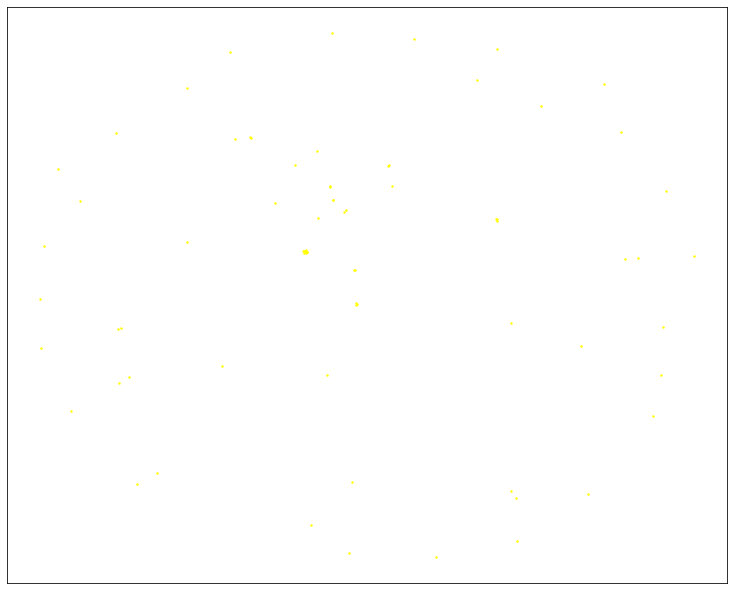

In [86]:
# 各種不同的繪圖方法 ################################
# input: edges ####################################
G = nx.DiGraph()   # directed
# G = nx.Graph()   # undirected    
G.add_weighted_edges_from(edges)
edg =G.edges()
nod=G.nodes()

# 節點顏色大小
nod_size=2
nod_color="yellow"

# 連結寬度
wide=1
edge_color='green'

print (len(df))        
plt.figure(figsize=(10,8))
nx.draw(G,node_color=nod_color,edge_color=edge_color,width=wide,node_size= nod_size,with_labels=True)
# nx.draw_spring(G,node_color=nod_color,edge_color=edge_color,width=wide,node_size= nod_size,with_labels=True)
# nx.draw_networkx(G,node_color=nod_color,edge_color=edge_color,width=wide,node_size= nod_size,with_labels=True)
# x.draw_spectral(G,node_color=nod_color,edge_color=edge_color,width=wide,node_size= nod_size,with_labels=True)
# nx.draw_random(G,node_color=nod_color,edge_color=edge_color,width=wide,node_size= nod_size,with_labels=True)
# nx.draw_circular(G,node_color=nod_color,edge_color=edge_color,width=wide,node_size= nod_size,with_labels=True)
plt.show()  


## 注意： networkx 有問題，無法直接繪圖，請用nodexl

In [94]:
# save excel
path="D:/my python/people/working/"     #先建一個 working 目錄
fname=path+"network_"+"count_"+title+".xlsx"
writer = pd.ExcelWriter(fname)
df_pair_count.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [95]:
###################################################
import pandas as pd
path="D:/my python/people/working/"    
fname=path+"network_"+"count_"+title+".xlsx"
df_pair_count=pd.read_excel(fname, 0)
df_pair_count

,Unnamed: 0,name1,name2,count
0,0,台湾,问题,10488
1,1,中国,人民,8643
2,2,台湾,中国,7106
3,3,台湾,人民,5067
4,4,领土,台湾,4732
...,...,...,...,...
95,95,所谓,台湾,880
96,96,反对,美国,876
97,97,台湾,发展,875
98,98,台湾,同胞,874


# nodexl
* https://www.smrfoundation.org/nodexl/
* 填表申請安裝
* 社會網絡分析超集好用軟體
* network .xlsx 可匯入，然第一個空白欄需先刪除

# 加入 people 模組 （待補）

In [1]:
import people


    歡迎進入 people 模組，函數列表
    資料選取
        (df, df_year)=people.doc_select(year, path, title, kw, field, unit)
        df=people.read_doc_select(path, unit, field, title)  
        df_year=people.read_doc_select_year(path, unit, field, title)  
        people.plot_doc_select_year(df_year)
        people.print_doc_select_random(df,num,title,field)
        people.print_filename(filenames, field)
        df=people.read_doc_select_pkl(path, unit, field,title)  
        
    主題分析
        (df_topic, df, df_lsa)=people.topic model(doc_list,num_i, method)  
        ts=people.plot_topic_model_trend(year, df_lsa,topics, num_i) 
        people.plot_topic_model_pei(topics, ts)
        people.plot_topic_model_bar(topics,size)
    其他
    


## 與某個標的詞共同出現的詞對

### target_pair_year(year, path, title, kw)

In [15]:
def target_pair_year(year, path, title, kw):
    from collections import Counter
    import pandas as pd
    import numpy
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    import io
    import re

    # 中文設定1: 楷體字
    from matplotlib import rcParams
    rcParams["font.sans-serif"] = ["kaiu"] 
    rcParams["font.family"] ="DFKai-sb"

    # 依不同年度，分別計算詞對數，會很花時間
    pair_word=[]
    pair_count=[]
    pair_dict=[]
    for n in range(len(year)):
        # 宣告計數器
        word_pair_count=Counter()
        fname=str(year[n])+"_jieba.xlsx"
        df=pd.read_excel(path + 'jieba/' + fname, 0)  
        token=list(df.token)
        for t in range(len(token)):
            try:  # 有些文章無值會出現 error, 跳過
                tokens=token[t]
                # 刪除標點符號
                tok=re.sub(r"[、。（），：％；《》“”]","",tokens)
                tok=tok.split()    
                # 間隔 m 個字以內的配對，稱為 window=m ##################
                m=10
                for i in range(len(tok)-1):
                    # j 代表距離 從 1 到 m
                    for j in range(1,m+1):     
                        # i+j 代表間隔 j 以後的下一個字詞
                        if i+j < len(tok):            
                            # tuple
                            (w1,w2)=tok[i],tok[i+j]
                            # 關鍵字出對在詞對的第一個與第二個位置均納入，單一字不列入
                            # 此處 kw 為台灣，亦即尋找與台灣的配對
                            if (w1 in kw) and len(w2)>1 and w2 not in kw:
                              # 如果從語料庫篩選詞彙  
                              # if (w2 in corpus):  
                                # 詞對計數
                                word_pair_count[(kw[0],w2)]+=1
                                # 倒過來，再計一次，到時候刪除重覆
                                word_pair_count[(w2,kw[0])]+=1      
                            elif (w2 in kw) and len(w1)>1 and w1 not in kw:
                                # if (w2 in corpus):  
                                word_pair_count[(w1,kw[0])]+=1
                                word_pair_count[(kw[0],w1)]+=1

            except:
                pass   

        # 選取前 100 大配對，重覆的詞對刪除  ##################  
        pai=[]
        cou=[]
        for w,c in word_pair_count.most_common(100):   # 前 100 大
            # 只取關鍵字在前，配對詞在後者
            if w[0] == kw[0]:
                pai.append(w[1])
                cou.append(c)            
        pair_word.append(pai)
        pair_count.append(cou)    
        dic = dict(zip(pai,cou))                       
        pair_dict.append(dic) 
        print (year[n],"done", end=" ")

    # 與台灣最常共同出現的詞對，及其個數
    data=list(zip(year,pair_word,pair_count,pair_dict))
    df4=pd.DataFrame(data,columns=["year","pair_word","pair_count","pair_dict"])    
    df4.index=range(len(df4))
                         
    fname=path+"working/"+ title + "_target_pair_year.xlsx"
    writer = pd.ExcelWriter(fname)
    df4.to_excel(writer,'Sheet1',encoding='utf-8')
    writer.save()                                      
    return df4

In [16]:
#########################################################
# 可選擇特定的年度，年度多跑起來時間會很久 #################
year=[1948,1949,
      1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
      1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
      2010,2011,2012]
title='台湾'
kw=["台湾"]    # 可以多個關鍵字 list
path='d:/My python/people/'
df=target_pair_year(year, path, title, kw)

1948 done 1949 done 1950 done 1951 done 1952 done 1953 done 1954 done 1955 done 1956 done 1957 done 1958 done 1959 done 1960 done 1961 done 1962 done 1963 done 1964 done 1965 done 1966 done 1967 done 1968 done 1969 done 1970 done 1971 done 1972 done 1973 done 1974 done 1975 done 1976 done 1977 done 1978 done 1979 done 1980 done 1981 done 1982 done 1983 done 1984 done 1985 done 1986 done 1987 done 1988 done 1989 done 1990 done 1991 done 1992 done 1993 done 1994 done 1995 done 1996 done 1997 done 1998 done 1999 done 2000 done 2001 done 2002 done 2003 done 2004 done 2005 done 2006 done 2007 done 2008 done 2009 done 2010 done 2011 done 2012 done 

In [17]:
df

,year,pair_word,pair_count,pair_dict
0,1948,"[美国, 人民, 日本, 我们, 蒋匪, 国民党, 华南, 美帝国主义, 出卖, 中国, 公...","[58, 24, 21, 21, 20, 20, 16, 16, 15, 15, 14, 1...","{'美国': 58, '人民': 24, '日本': 21, '我们': 21, '蒋匪':..."
1,1949,"[人民, 美国, 中国, 国民党, 日本, 解放, 美帝国主义, 蒋介石, 我们, 侵略, ...","[288, 281, 190, 162, 140, 127, 92, 87, 67, 63,...","{'人民': 288, '美国': 281, '中国': 190, '国民党': 162, ..."
2,1950,"[美国, 侵略, 朝鲜, 中国, 人民, 我们, 反对, 领土, 我国, 解放, 问题, 美...","[1887, 1565, 1301, 1127, 952, 641, 640, 508, 5...","{'美国': 1887, '侵略': 1565, '朝鲜': 1301, '中国': 112..."
3,1951,"[美国, 人民, 侵略, 中国, 朝鲜, 日本, 我国, 美帝国主义, 我们, 领土, 侵占...","[433, 407, 386, 352, 337, 291, 226, 214, 197, ...","{'美国': 433, '人民': 407, '侵略': 386, '中国': 352, '..."
4,1952,"[我国, 美国, 中国, 朝鲜, 人民, 国民党, 侵略, 领土, 日本, 侵占, 美帝国主...","[107, 105, 103, 87, 79, 77, 67, 64, 63, 55, 52...","{'我国': 107, '美国': 105, '中国': 103, '朝鲜': 87, '人..."
...,...,...,...,...
60,2008,"[大陆, 问题, 两岸, 中国, 发展, 表示, 支持, 北京, 我们, 经济, 民众, 两...","[459, 360, 289, 272, 217, 162, 151, 140, 136, ...","{'大陆': 459, '问题': 360, '两岸': 289, '中国': 272, '..."
61,2009,"[大陆, 两岸, 问题, 发展, 中国, 方面, 交流, 合作, 表示, 我们, 经济, 民...","[772, 476, 313, 252, 218, 196, 192, 188, 184, ...","{'大陆': 772, '两岸': 476, '问题': 313, '发展': 252, '..."
62,2010,"[大陆, 两岸, 中国, 发展, 民众, 交流, 问题, 方面, 文化, 经济, 合作, 表...","[658, 390, 243, 214, 202, 196, 182, 175, 168, ...","{'大陆': 658, '两岸': 390, '中国': 243, '发展': 214, '..."
63,2011,"[大陆, 两岸, 发展, 问题, 合作, 中国, 交流, 方面, 民众, 企业, 香港, 表...","[645, 334, 211, 200, 186, 186, 149, 144, 142, ...","{'大陆': 645, '两岸': 334, '发展': 211, '问题': 200, '..."


### read_target_pair_year(title)

In [22]:
def read_target_pair_year(title):
    import pandas as pd
    fname=path+"working/"+ title + "_target_pair_year.xlsx"
    df=pd.read_excel(fname, 0)
    return df

In [24]:
title='台湾'
df=read_target_pair_year(title)
df

,Unnamed: 0,year,pair_word,pair_count,pair_dict
0,0,1948,"['美国', '人民', '日本', '我们', '蒋匪', '国民党', '华南', '美...","[58, 24, 21, 21, 20, 20, 16, 16, 15, 15, 14, 1...","{'美国': 58, '人民': 24, '日本': 21, '我们': 21, '蒋匪':..."
1,1,1949,"['人民', '美国', '中国', '国民党', '日本', '解放', '美帝国主义',...","[288, 281, 190, 162, 140, 127, 92, 87, 67, 63,...","{'人民': 288, '美国': 281, '中国': 190, '国民党': 162, ..."
2,2,1950,"['美国', '侵略', '朝鲜', '中国', '人民', '我们', '反对', '领土...","[1887, 1565, 1301, 1127, 952, 641, 640, 508, 5...","{'美国': 1887, '侵略': 1565, '朝鲜': 1301, '中国': 112..."
3,3,1951,"['美国', '人民', '侵略', '中国', '朝鲜', '日本', '我国', '美帝...","[433, 407, 386, 352, 337, 291, 226, 214, 197, ...","{'美国': 433, '人民': 407, '侵略': 386, '中国': 352, '..."
4,4,1952,"['我国', '美国', '中国', '朝鲜', '人民', '国民党', '侵略', '领...","[107, 105, 103, 87, 79, 77, 67, 64, 63, 55, 52...","{'我国': 107, '美国': 105, '中国': 103, '朝鲜': 87, '人..."
...,...,...,...,...,...
60,60,2008,"['大陆', '问题', '两岸', '中国', '发展', '表示', '支持', '北京...","[459, 360, 289, 272, 217, 162, 151, 140, 136, ...","{'大陆': 459, '问题': 360, '两岸': 289, '中国': 272, '..."
61,61,2009,"['大陆', '两岸', '问题', '发展', '中国', '方面', '交流', '合作...","[772, 476, 313, 252, 218, 196, 192, 188, 184, ...","{'大陆': 772, '两岸': 476, '问题': 313, '发展': 252, '..."
62,62,2010,"['大陆', '两岸', '中国', '发展', '民众', '交流', '问题', '方面...","[658, 390, 243, 214, 202, 196, 182, 175, 168, ...","{'大陆': 658, '两岸': 390, '中国': 243, '发展': 214, '..."
63,63,2011,"['大陆', '两岸', '发展', '问题', '合作', '中国', '交流', '方面...","[645, 334, 211, 200, 186, 186, 149, 144, 142, ...","{'大陆': 645, '两岸': 334, '发展': 211, '问题': 200, '..."


## 文本內的所有詞對

### doc_pair_social_network(df,title,w)

In [54]:
## 計算卡方值
def chisquare(o11, o12, o21, o22):
    n = o11 + o12 + o21 + o22
    x_2 = (n * ((o11 * o22 - o12 * o21)**2)) / ((o11 + o12) * (o11 + o21) * (o12 + o22) * (o21 + o22)) 
    return x_2
def doc_pair_social_network(df,title,w):
    # tokens 文本 經斷詞 list
    token=df.token
    ## 計算所有詞對的頻率與詞對總數
    word_pair_count=Counter()
    num_bigrams=0
    for t in range(len(token)):
        tok=token[t]
        # 刪除標點符號
        tok=re.sub(r"[、。（），：％；《》“”]","",tok)
        tok=tok.split()    
        # 間隔 w 個字以內的配對，稱為 window=w ##################
        for i in range(len(tok)-1):
            for j in range(1,w+1):     
                if i+j < len(tok):     
                    (w1,w2)=tok[i],tok[i+j]
                    if len(w1)>1 and len(w2)>1:
                        word_pair_count[(w1,w2)]+=1   
                        num_bigrams += 1

    ## df_pair_count

    n=100
    name1=[]
    name2=[]
    count=[]
    for w,c in word_pair_count.most_common(n):  
        name1.append(w[0])
        name2.append(w[1])
        count.append(c)
    data=list(zip(name1,name2,count))
    df_pair_count=pd.DataFrame(data,columns=["name1","name2","count"])


    ## 計算前100大詞對卡方值
    ## 先計算詞頻
    word_counts = Counter()
    for t in range(len(token)):
        tok=token[t]
        # 刪除標點符號
        tok=re.sub(r"[、。（），：％；《》“”]","",tok)
        tok=tok.split()    
        # 間隔 w 個字以內的配對，稱為 window=w ##################
        w=3
        for i in range(len(tok)):
            word_counts[tok[i]]+=1
            
    pair_chi_squares = Counter()
    # 最常出現的詞對，前100對
    for (w1,w2), w1_w2_count in word_pair_count.most_common(100):
        # O12
        w1_only_count = word_counts[w1] - w1_w2_count
        # O21
        w2_only_count = word_counts[w2] - w1_w2_count
        # O22
        rest_count = num_bigrams - w1_only_count - w2_only_count - w1_w2_count
        # O11=w1_w2_count
        pair_chi_squares[(w1, w2)] = chisquare(w1_w2_count, w1_only_count, w2_only_count, rest_count)

    ##  df_pair_x_2
    n=100
    name1=[]
    name2=[]
    x_2=[]
    for w,c in pair_chi_squares.most_common(n):  
        name1.append(w[0])
        name2.append(w[1])
        x_2.append(c)
    df_pair_count["x_2"]=x_2

    # save excel
    path="D:/my python/people/working/"     #先建一個 working 目錄
    fname=path+"network_"+"count_"+title+".xlsx"
    writer = pd.ExcelWriter(fname)
    df_pair_count.to_excel(writer,'Sheet1',encoding='utf-8')
    writer.save()
    return df_pair_count

In [55]:
import people
path="D:/my python/people/" 
kw=["台湾"]
title="台灣"
field ="token"   #  token, doc_content tfidf, treerank 四選一
unit ="sent"     # sent, arti, para, word 四選一
df=people.read_doc_select(path, unit, field, title)
w=3  # window size
df=doc_pair_social_network(df,title,w)
df

,name1,name2,count,x_2
0,台湾,问题,10488,1.935938e+06
1,中国,人民,8643,1.695227e+06
2,台湾,中国,7106,1.638471e+06
3,台湾,人民,5067,1.569981e+06
4,领土,台湾,4732,1.508816e+06
...,...,...,...,...
95,所谓,台湾,880,3.560228e+03
96,反对,美国,876,3.373453e+03
97,台湾,发展,875,1.688201e+03
98,台湾,同胞,874,1.534487e+03


### read_doc_pair_social_network(df,title,w)

In [63]:
def read_doc_pair_social_network(title):
    import pandas as pd
    path="D:/my python/people/working/"    
    fname=path+"network_"+"count_"+title+".xlsx"
    df_pair_count=pd.read_excel(fname, 0)
    return df_pair_count

In [64]:
title="台灣"
df=read_doc_pair_social_network(title)

In [65]:
df

,Unnamed: 0,name1,name2,count,x_2
0,0,台湾,问题,10488,1.935938e+06
1,1,中国,人民,8643,1.695227e+06
2,2,台湾,中国,7106,1.638471e+06
3,3,台湾,人民,5067,1.569981e+06
4,4,领土,台湾,4732,1.508816e+06
...,...,...,...,...,...
95,95,所谓,台湾,880,3.560228e+03
96,96,反对,美国,876,3.373453e+03
97,97,台湾,发展,875,1.688201e+03
98,98,台湾,同胞,874,1.534487e+03


In [ ]:
title="台灣"
df=people.read_doc_pair_social_network(title)